# Library Imports

In [ ]:
from falqinparalib import falqin as fq

In [ ]:
flight = fq("../00_raw_data/igc/rmfalquier.2024-08-31.10-43-13.IGC")

# Exploration

### Heading information

- The first plot (heading) already showed a clear distinction between gliding state and climbing state based on the stability of the heading value
- The second plot (rate of change of heading) showed that there appears to be a band between abs(0, 10) degrees per second that distinguishes gliding from other states
- The third plot (normalized histogram of rate of change of heading) shows a somewhat normally distributed distribution of the rate across the flight with a slight bias for left turns

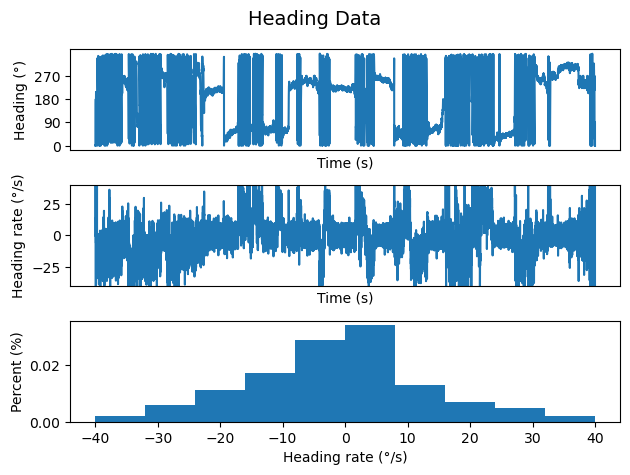

In [3]:
flight.plot_heading_data()

### Gliding and climbing

- The gliding histogram seems to indicate that there may be an extractable average XC glide ratio, may permit analysis that requires assumption of normal distr. to be true
- The sink rate when gliding histogram seems to indicate that there may be an extractable average sink rate, may permit analysis that requires assumption of normal distr. to be true
- The climb rate when thermalling histogram seems uninteresting at a flight level, may be useful for quality of day assessments but otherwise what you would expect

**NOTE:** The gliding state ignores values where the glide ratio is above 20 as these are for all intents and purposes irrelevant in meaningful analysis of paraglider performance

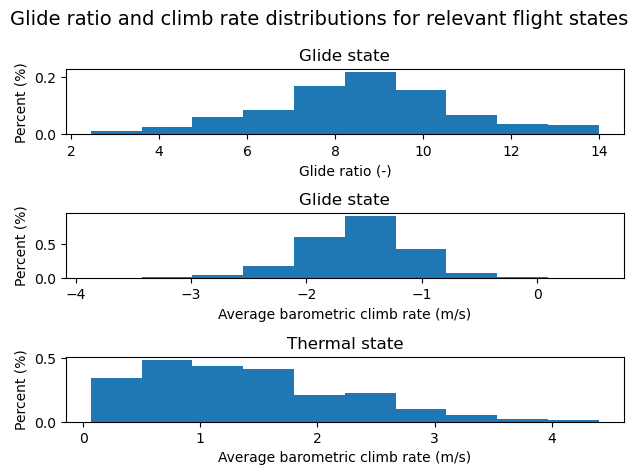

In [4]:
flight.plot_glide_climb_distr()

### Gliding Polar Prelim Exploration
- Both plots seem to show the general shape that would be expected however, the values seem scattered on columns for respective ground speed bins. May be interesting to do a mean analysis for the corresponding sink rate and glide ratio value at each speed bin with corresponding uncertainty bands
- There appears to be a gap in data around 7 m/s which is close to approximate expected stall speed

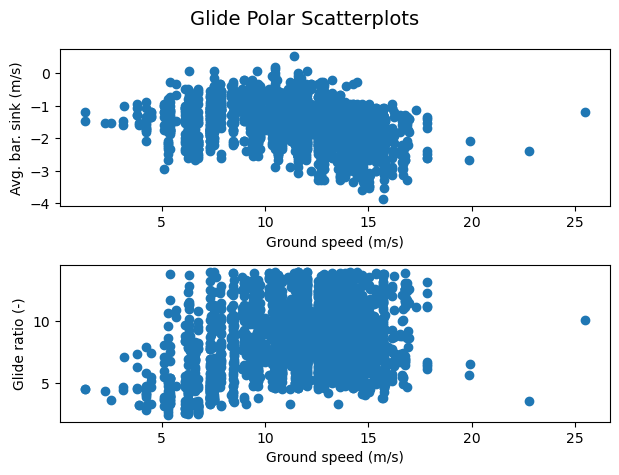

In [5]:
flight.plot_glide_polar_scatters()

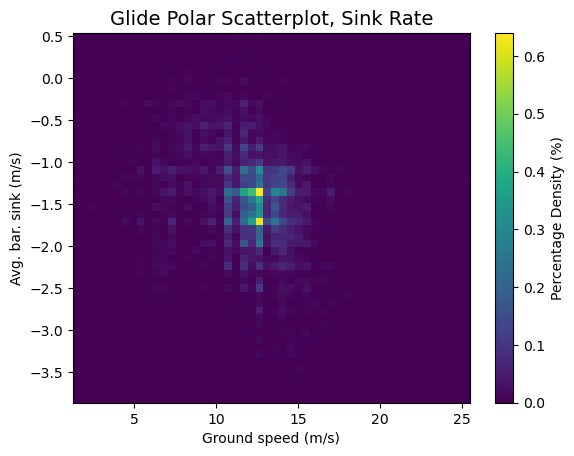

In [6]:
flight.plot_glide_sink_heatmap()

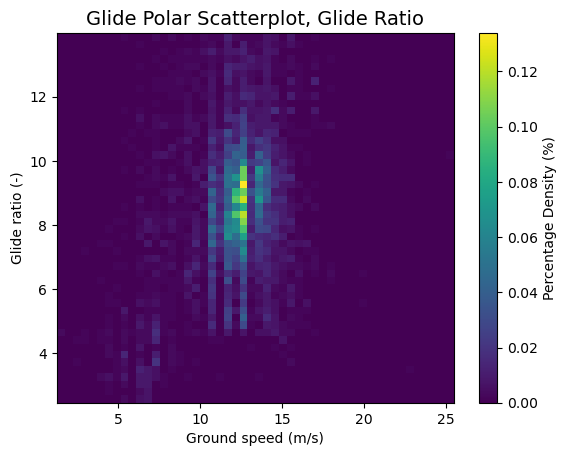

In [7]:
flight.plot_glide_ratio_heatmap()

### Ground speed histogram

- Not sure that there is a signal for stall speed here but could be interesting to see with more data, potentially too noisy given air speed disparity

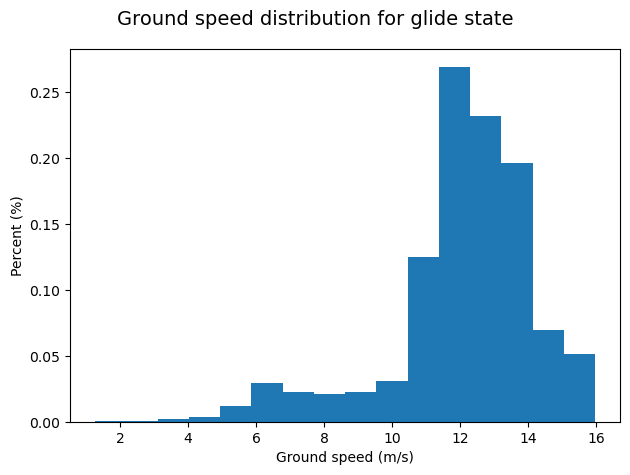

In [8]:
flight.plot_ground_speed_hist()

### Sanity check: plot the track and color based on flight state
- No surprises. There is likey room for improvement of the state definitions but at a first glance, seems appropriate for intended analysis

In [9]:
flight.plot_3d_track()

### Climb rate vs. Rate of Turn exploration

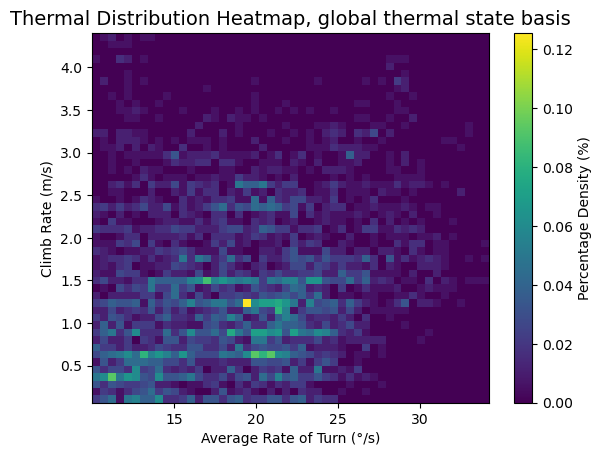

In [10]:
flight.plot_climb_rot_heatmap_global()

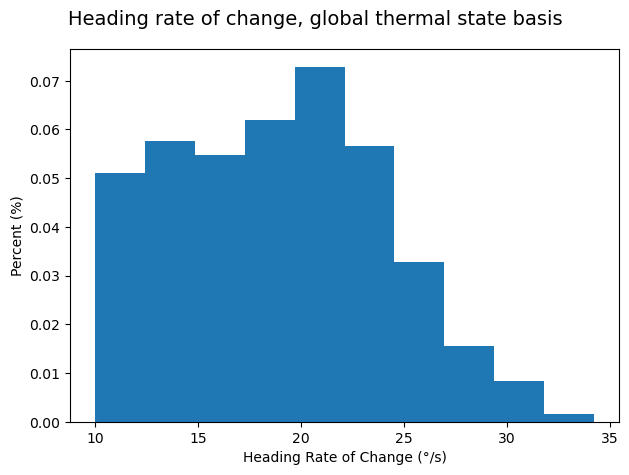

In [11]:
flight.plot_rot_rate_hist_global()

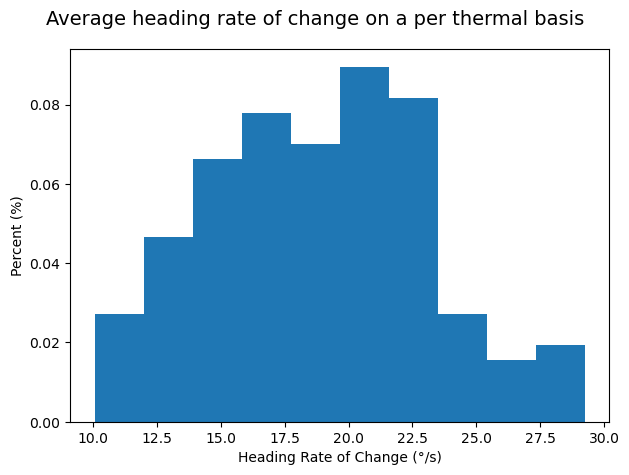

In [12]:
flight.plot_rot_rate_hist_per_thermal()

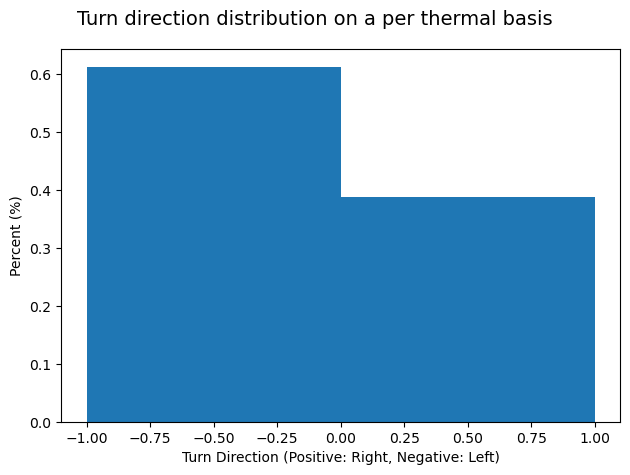

In [13]:
flight.plot_turn_dir_distr_per_thermal()

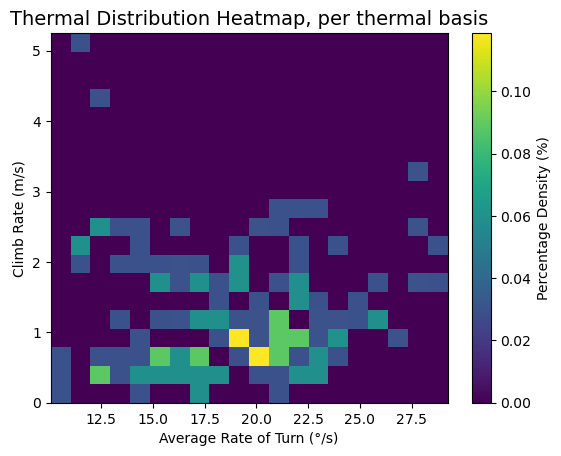

In [14]:
flight.plot_climb_rot_heatmap_per_thermal()

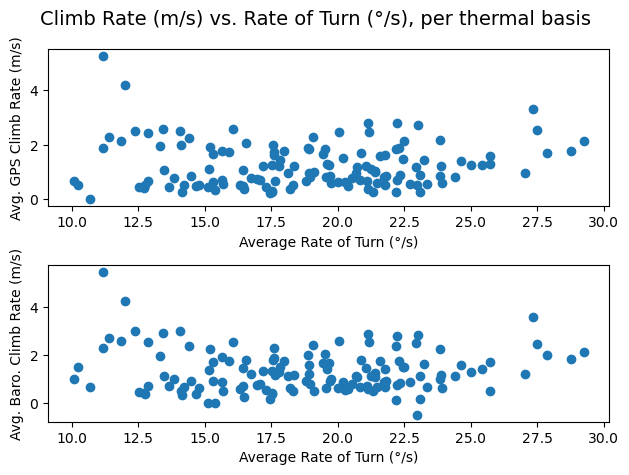

In [15]:
flight.plot_climb_rot_scatter_per_thermal()

### Mean statistical analysis of Glide Polar for ground speed bins

**NOTE**: For a low-efficiency airfoil, Oswald efficiency factor e<1, e≈0.8 (typical for non-elliptical lift distributions), AR=7, CD0≈0.025 (higher due to poor efficiency):

**L/D max ≈14.1**

In [16]:
flight.speed_bins

array([ 7.25,  7.75,  8.25,  8.75,  9.25,  9.75, 10.25, 10.75, 11.25,
       11.75, 12.25, 12.75, 13.25, 13.75, 14.25, 14.75, 15.25, 15.75,
       16.25])

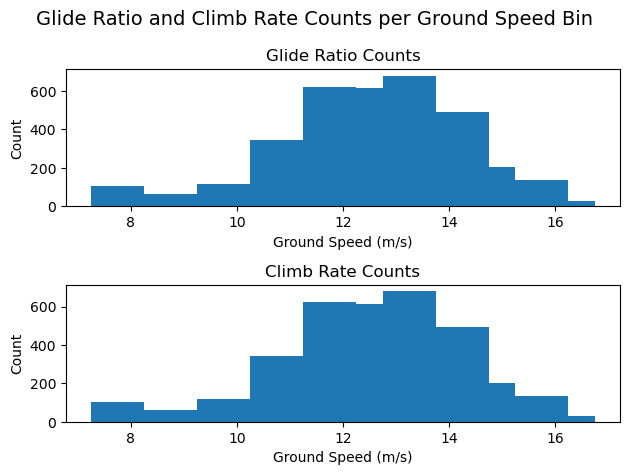

In [17]:
flight.plot_glide_climb_counts()

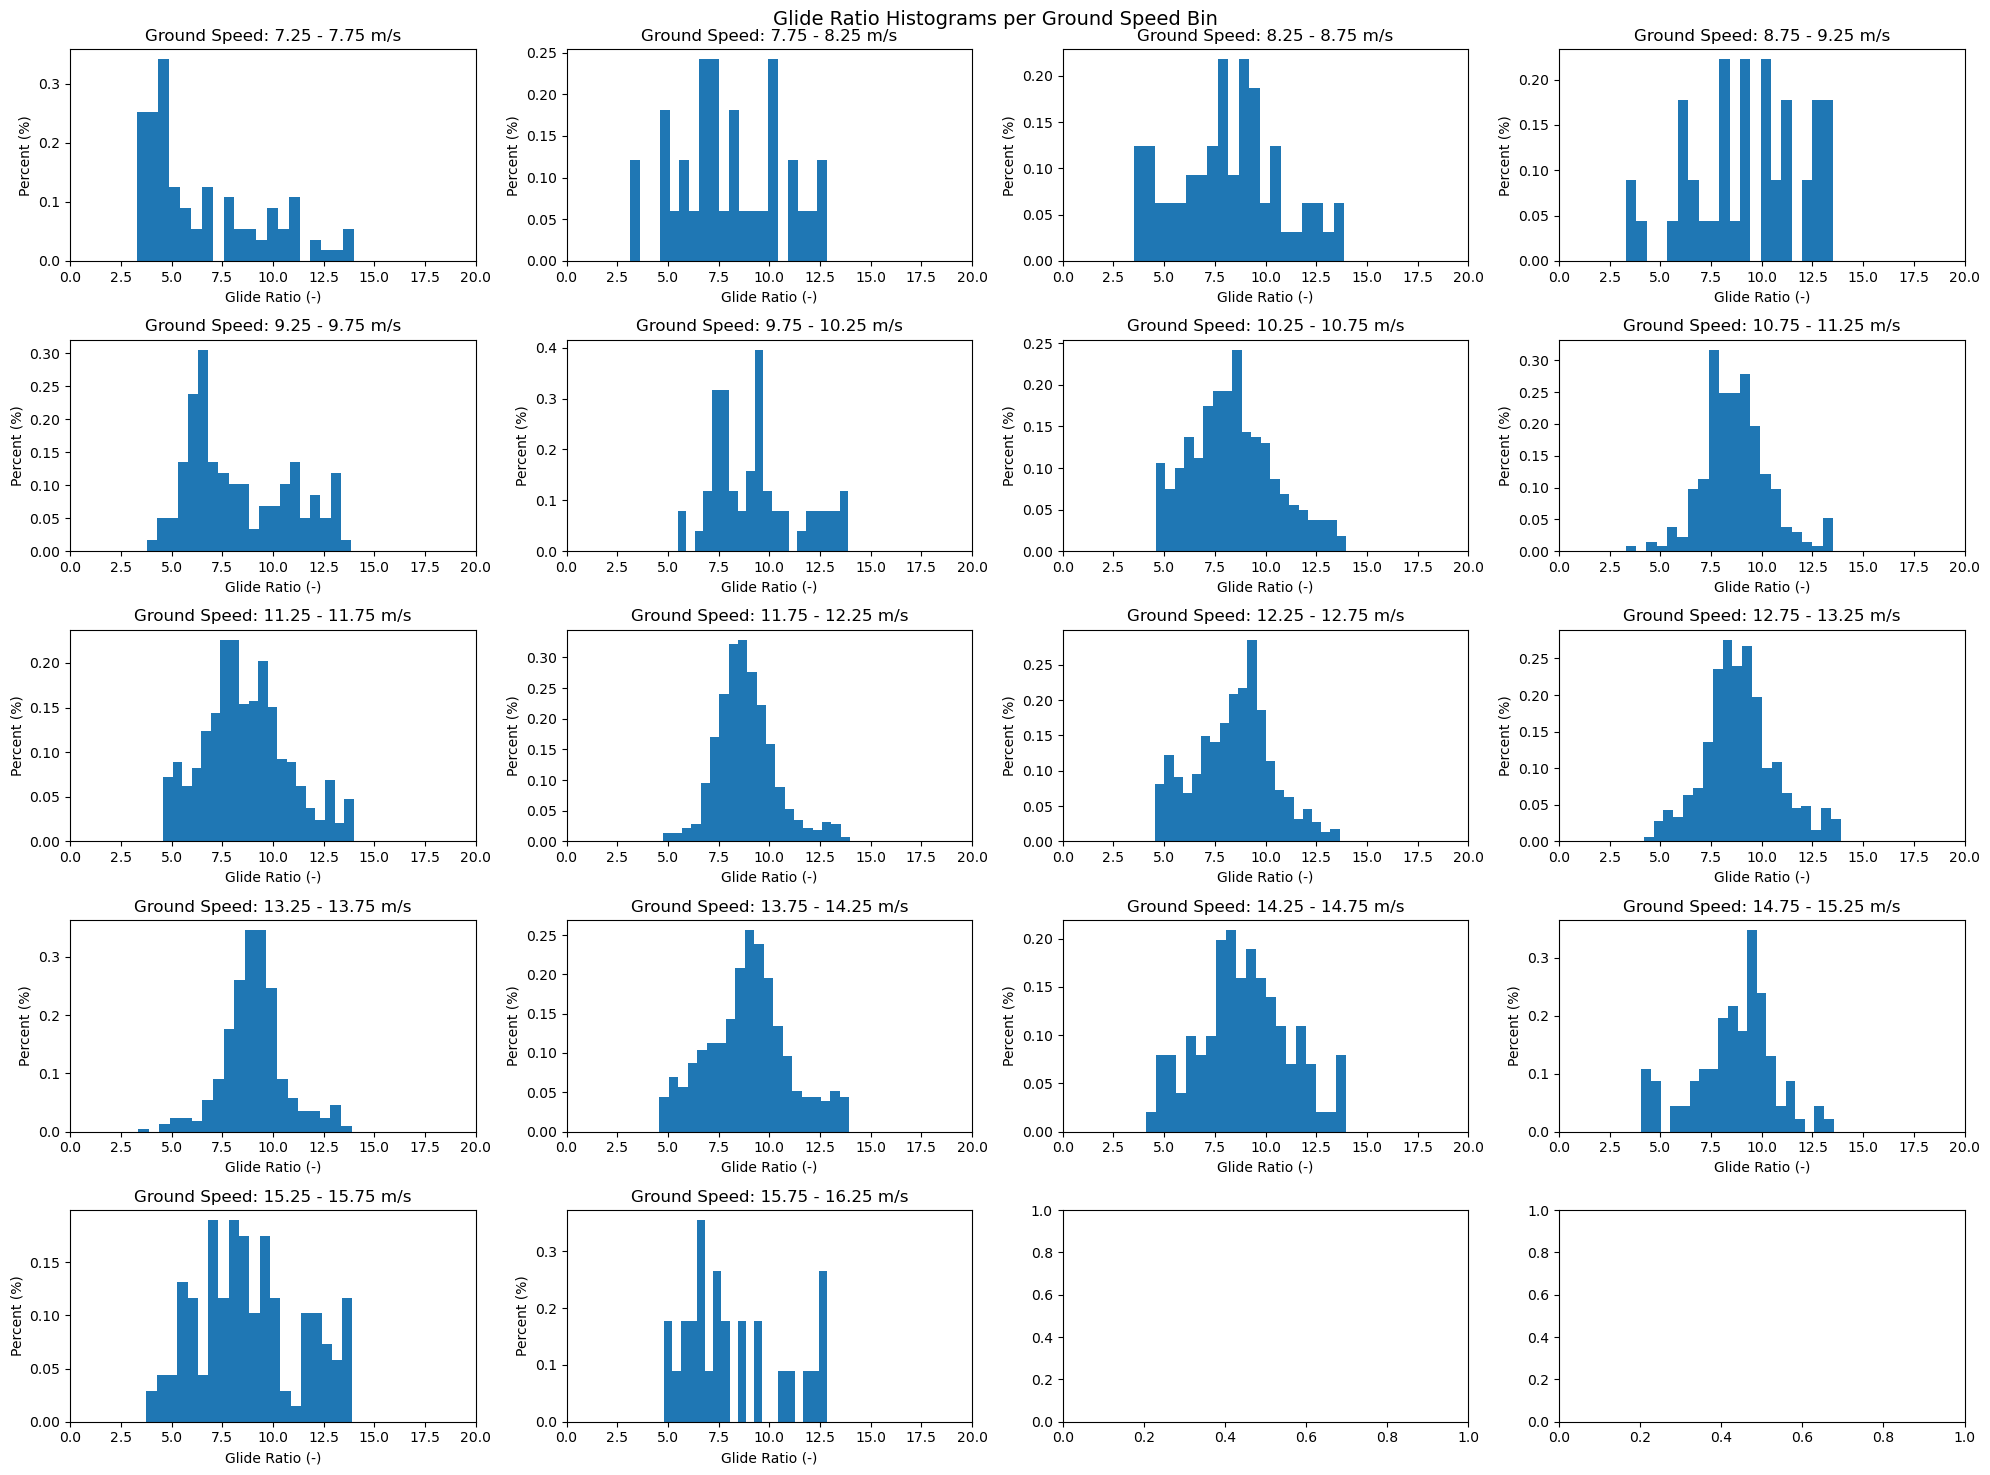

In [18]:
flight.plot_speed_bin_glide_ratio_hists()

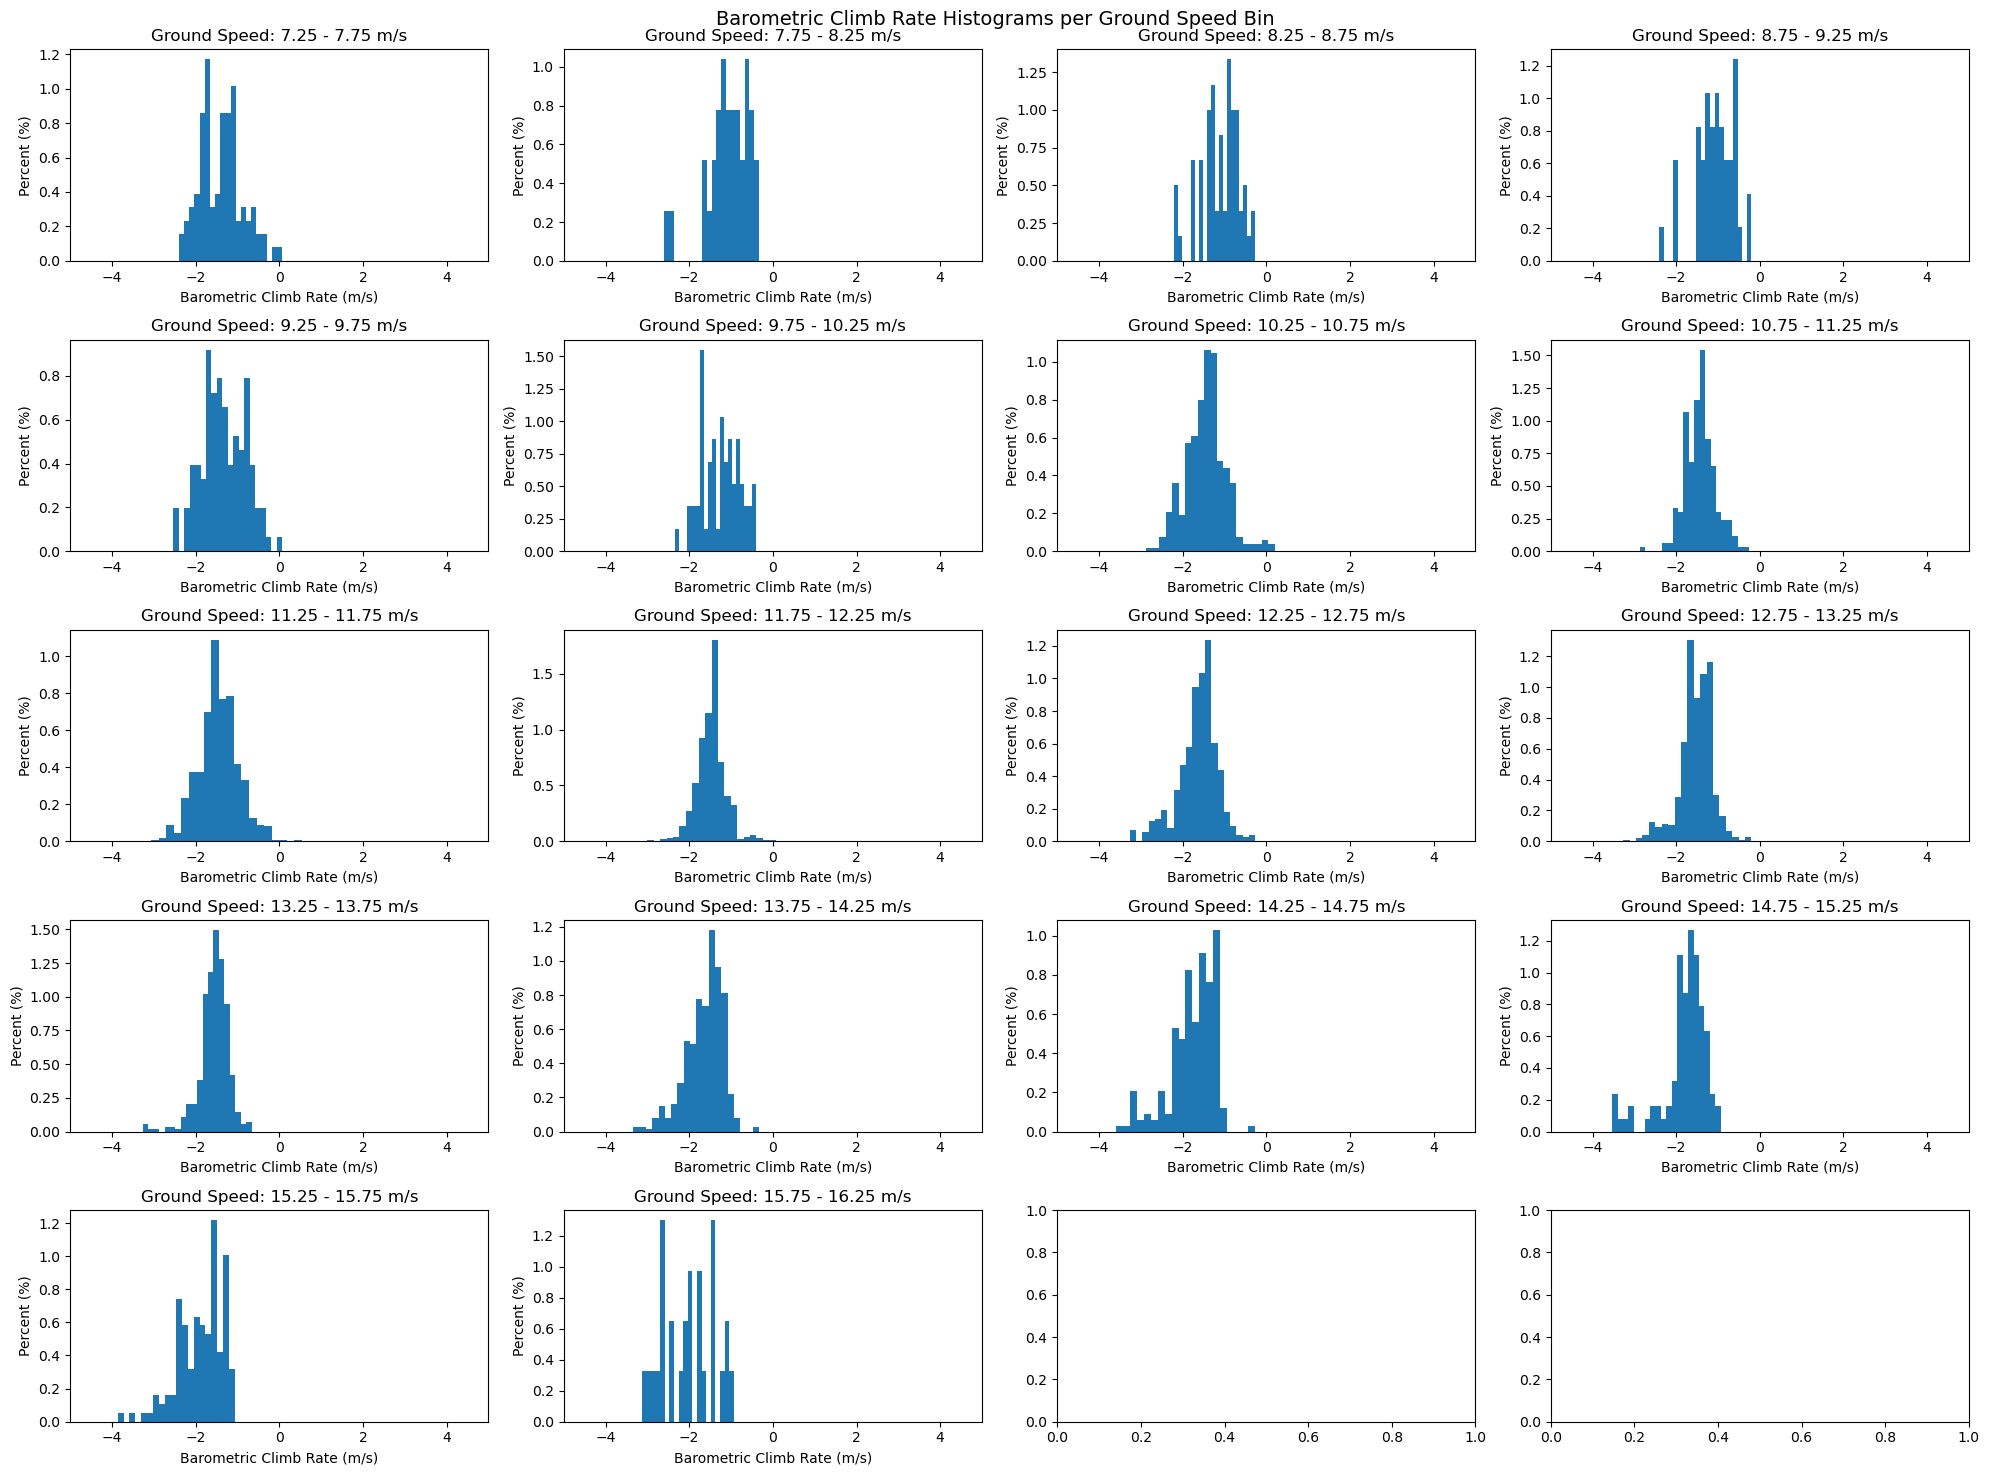

In [19]:
flight.plot_speed_bin_baro_climb_hists()

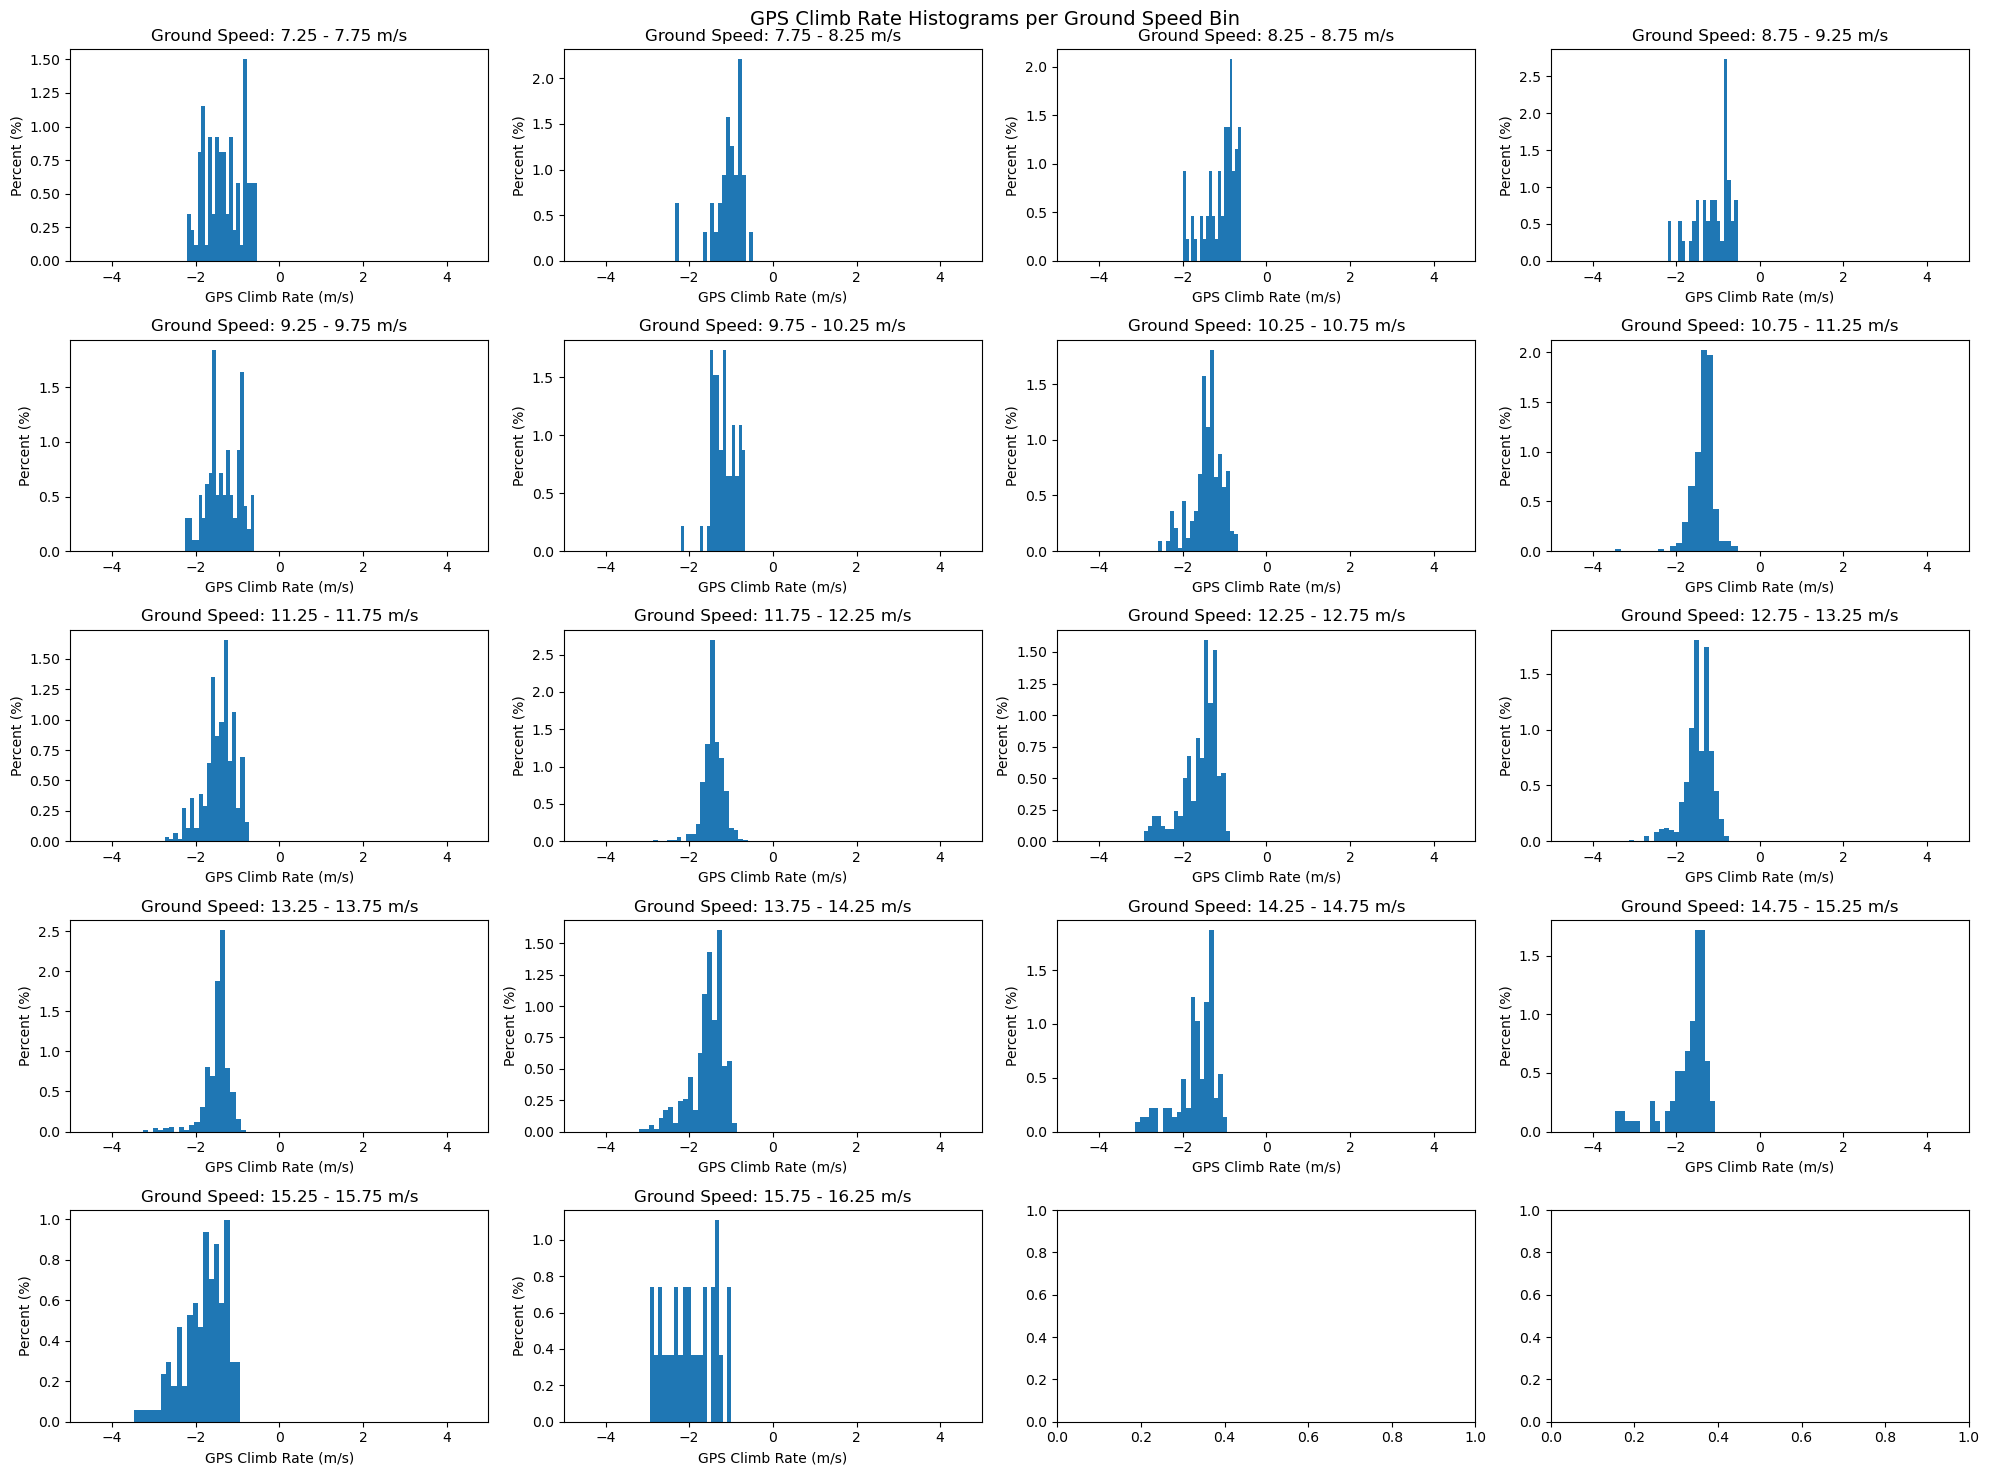

In [20]:
flight.plot_speed_bin_gps_climb_hists()

In [21]:
flight.speed_bin_stats

,Speed Bin,Glide Ratio Mean,Glide Ratio Median,Glide Ratio Std Dev,Glide Ratio Q1,Glide Ratio Q3,Glide Ratio Q3,Glide Ratio IQR,Barometric Climb Rate Mean,Barometric Climb Rate Median,...,Barometric Climb Rate Q1,Barometric Climb Rate Q3,Barometric Climb Rate IQR,GPS Climb Rate Mean,GPS Climb Rate Median,GPS Climb Rate Std Dev,GPS Climb Rate Q1,GPS Climb Rate Q3,GPS Climb Rate IQR,Ground Speed Median
0,7.25 - 7.75 m/s,6.552397,5.182075,2.936194,4.308974,8.365331,8.365331,4.056356,-1.392308,-1.4,...,-1.733333,-1.066667,0.666667,-1.323077,-1.333333,0.457447,-1.666667,-0.866667,0.8,7.5
1,7.75 - 8.25 m/s,8.024509,7.718609,2.573718,6.353347,10.091333,10.091333,3.737986,-1.062745,-1.033333,...,-1.266667,-0.683333,0.583333,-1.084314,-1.0,0.396044,-1.183333,-0.8,0.383333,8.0
2,8.25 - 8.75 m/s,8.17219,8.216391,2.680694,6.412685,9.641581,9.641581,3.228897,-1.106452,-1.066667,...,-1.333333,-0.8,0.533333,-1.096774,-1.0,0.375124,-1.333333,-0.866667,0.466667,8.5
3,8.75 - 9.25 m/s,9.288367,9.203787,2.747545,7.546388,11.254276,11.254276,3.707889,-1.060606,-1.033333,...,-1.3,-0.666667,0.633333,-1.130303,-1.033333,0.438214,-1.366667,-0.8,0.566667,9.0
4,9.25 - 9.75 m/s,8.340307,7.630605,2.547771,6.406903,10.696969,10.696969,4.290067,-1.337892,-1.4,...,-1.666667,-0.866667,0.8,-1.345299,-1.4,0.410272,-1.6,-1.0,0.6,9.5
5,9.75 - 10.25 m/s,9.333154,9.083351,2.129722,7.720338,10.269647,10.269647,2.549309,-1.254444,-1.266667,...,-1.666667,-0.916667,0.75,-1.185556,-1.2,0.292555,-1.4,-0.933333,0.466667,10.0
6,10.25 - 10.75 m/s,8.405529,8.321757,2.089845,6.954726,9.71814,9.71814,2.763415,-1.451895,-1.466667,...,-1.733333,-1.2,0.533333,-1.410884,-1.4,0.371094,-1.6,-1.2,0.4,10.5
7,10.75 - 11.25 m/s,8.717597,8.639908,1.611949,7.714101,9.551343,9.551343,1.837242,-1.423681,-1.4,...,-1.666667,-1.2,0.466667,-1.365251,-1.333333,0.267203,-1.466667,-1.266667,0.2,11.0
8,11.25 - 11.75 m/s,8.666872,8.433645,2.094851,7.283521,9.890051,9.890051,2.60653,-1.4612,-1.466667,...,-1.733333,-1.2,0.533333,-1.440622,-1.4,0.363538,-1.6,-1.2,0.4,11.5
9,11.75 - 12.25 m/s,8.85846,8.720122,1.465446,7.953379,9.58737,9.58737,1.633991,-1.482385,-1.466667,...,-1.666667,-1.333333,0.333333,-1.420163,-1.4,0.234698,-1.533333,-1.333333,0.2,12.0


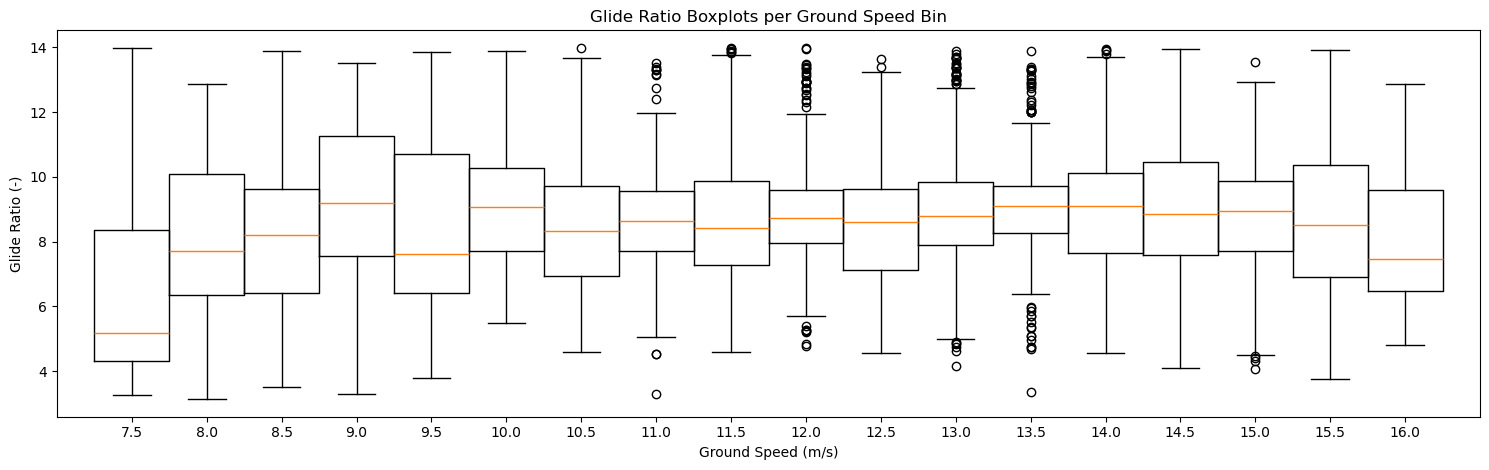

In [22]:
flight.plot_ground_speed_bin_gr_boxes()

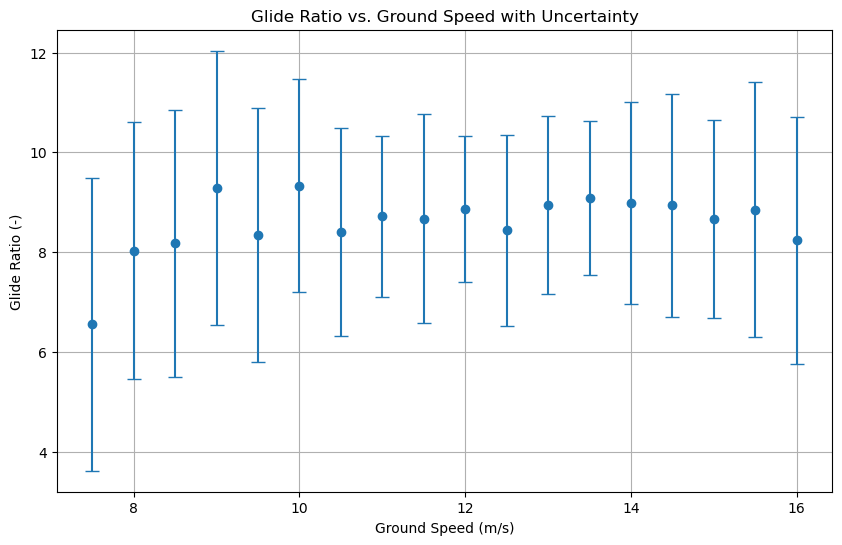

In [23]:
flight.plot_ground_speed_bin_gr_uncertainties()

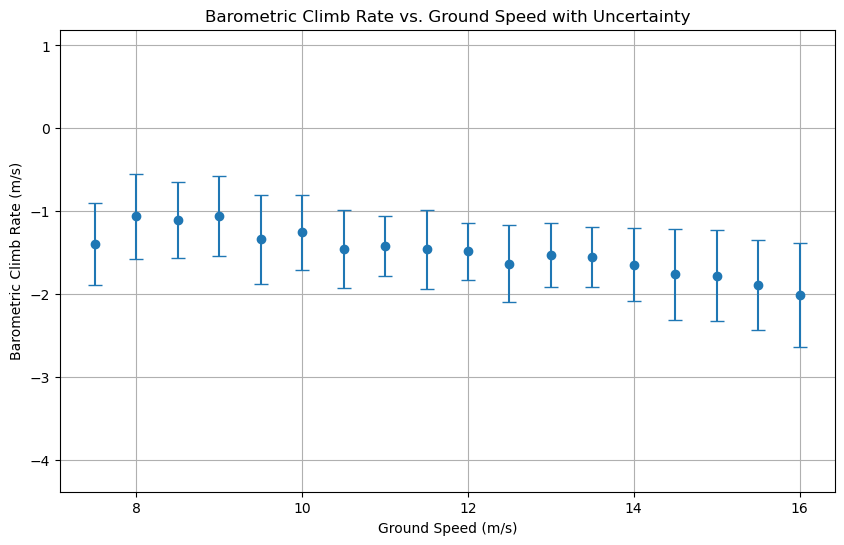

In [24]:
flight.plot_ground_speed_bin_baro_climb_uncertainties()

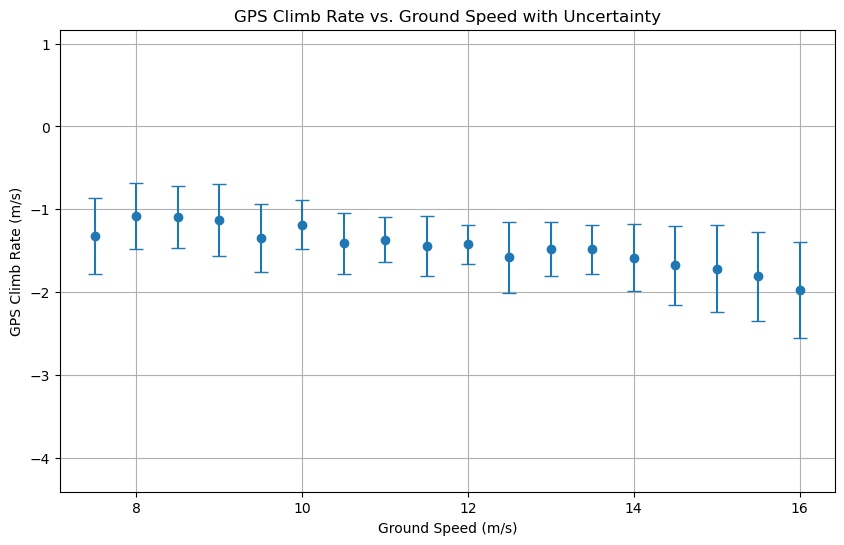

In [25]:
flight.plot_ground_speed_bin_gps_climb_uncertainties()

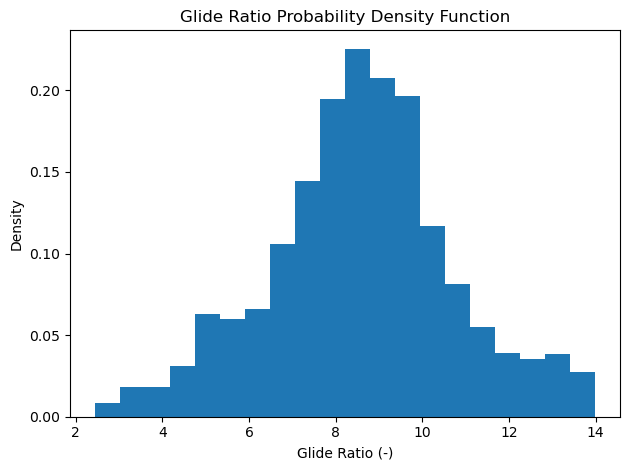

In [26]:
flight.plot_PDF_glide_ratio()

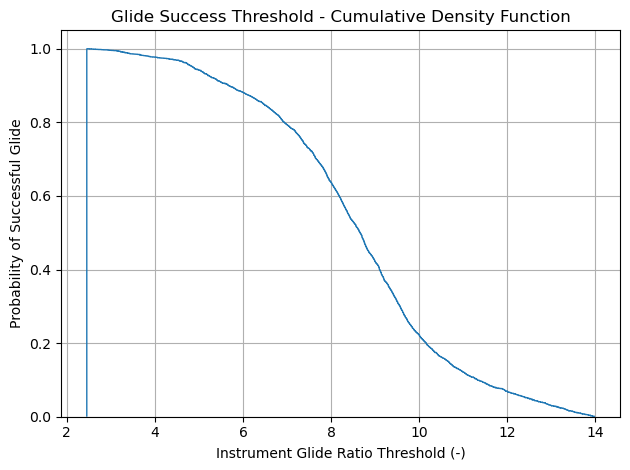

In [27]:
flight.plot_glide_success_threshold()

# General Statistical Exploration (all IGCs)

In [ ]:
flights = fq("../00_raw_data/igc/",15,"default",14,True,True)

IGC parsing initialized with:
   -Filepath: ../00_data/raw/igc/
   -Averaging window: 15
   -Speed bins: min 7.25, max 16.25, count 19
   -Max L/D: 14
   -Folder: True
   -Verbose: True

IGC file 1/17 parsed for General, Thermals, and Gliding
IGC file 2/17 parsed for General, Thermals, and Gliding
IGC file 3/17 parsed for General, Thermals, and Gliding
IGC file 4/17 parsed for General, Thermals, and Gliding
IGC file 5/17 parsed for General, Thermals, and Gliding
IGC file 6/17 parsed for General, Thermals, and Gliding
IGC file 7/17 parsed for General, Thermals, and Gliding
IGC file 8/17 parsed for General, Thermals, and Gliding
IGC file 9/17 parsed for General, Thermals, and Gliding
IGC file 10/17 parsed for General, Thermals, and Gliding
IGC file 11/17 parsed for General, Thermals, and Gliding
IGC file 12/17 parsed for General, Thermals, and Gliding
IGC file 13/17 parsed for General, Thermals, and Gliding
IGC file 14/17 parsed for General, Thermals, and Gliding
IGC file 15/17 parsed fo

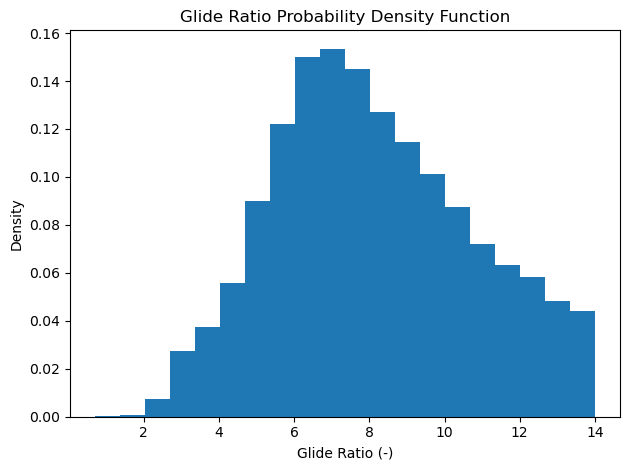

In [29]:
flights.plot_PDF_glide_ratio()

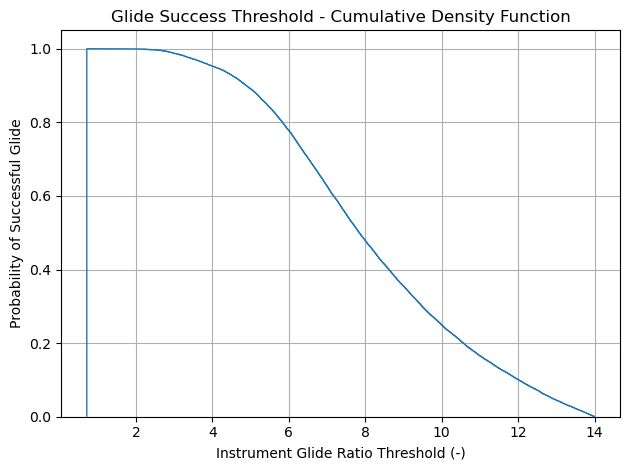

In [30]:
flights.plot_glide_success_threshold()

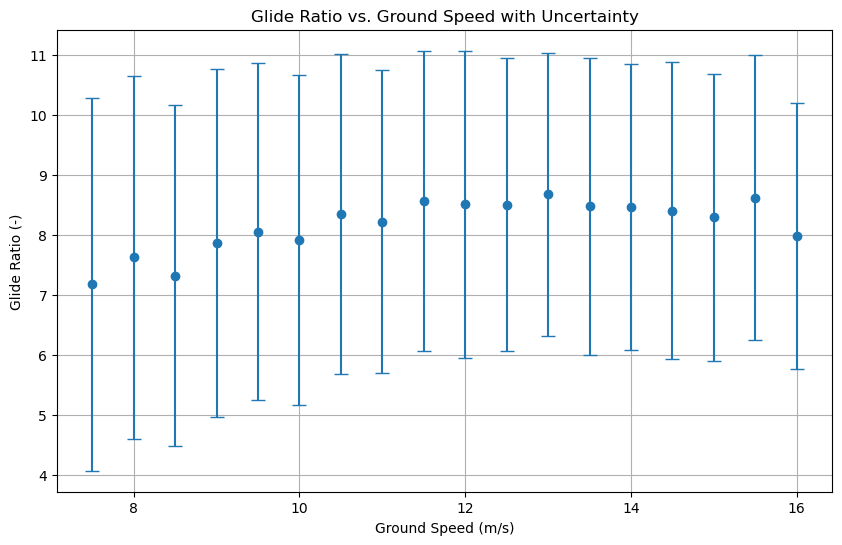

In [31]:
flights.plot_ground_speed_bin_gr_uncertainties()

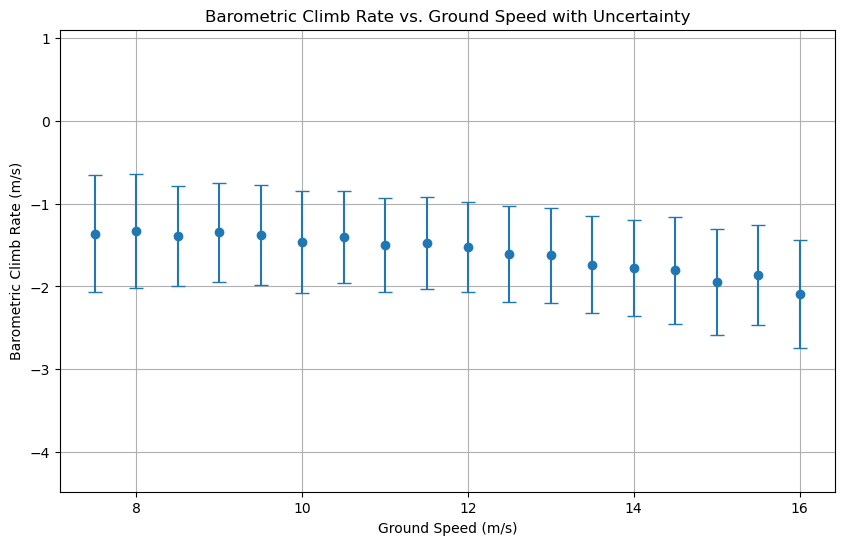

In [32]:
flights.plot_ground_speed_bin_baro_climb_uncertainties()

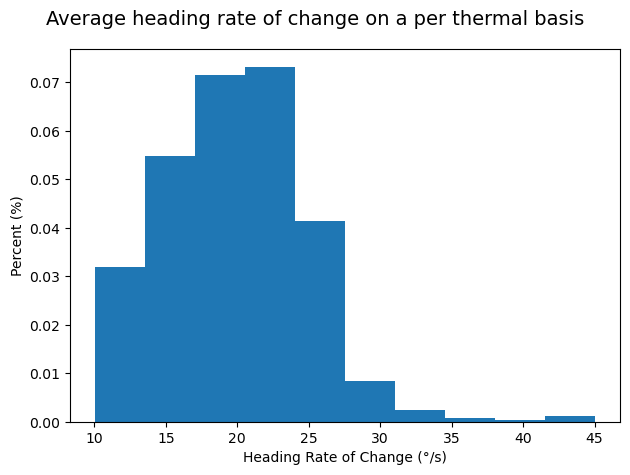

In [33]:
flights.plot_rot_rate_hist_per_thermal()

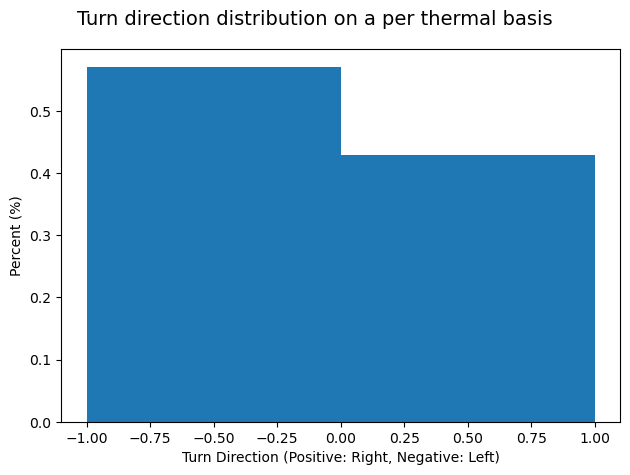

In [34]:
flights.plot_turn_dir_distr_per_thermal()

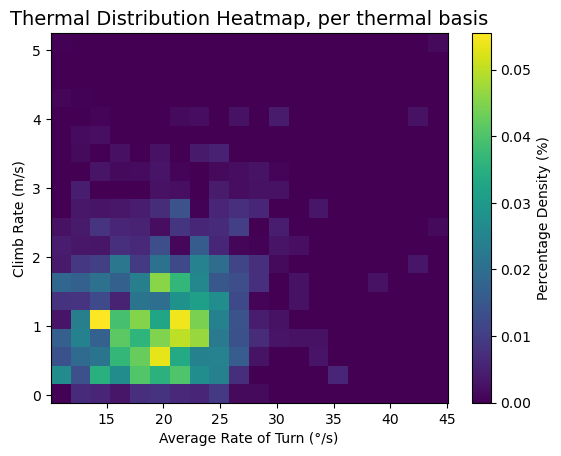

In [35]:
flights.plot_climb_rot_heatmap_per_thermal()